Solar velocity arround GC     v_Sun =  220.0  km / s
Wimp density                    rho =  267.0  GeV / km^3 
Wimp-nucleon cross section    sigma =  0.333846944016 km^2 SD Wimp-proton    
ffrom Ellis,Olive and Savage (2008) 
 proton mass                    m_p =  2.19e-06  GeV for SD is Hydorgen mass
Nuclear radius(depends on m_i)  r_i =  1.2e-13  ^km for hydrogen
Escape velocity               u_esc =  544.0 km / s
Dispertion velocity             v_0 =  27010000.0 km /s


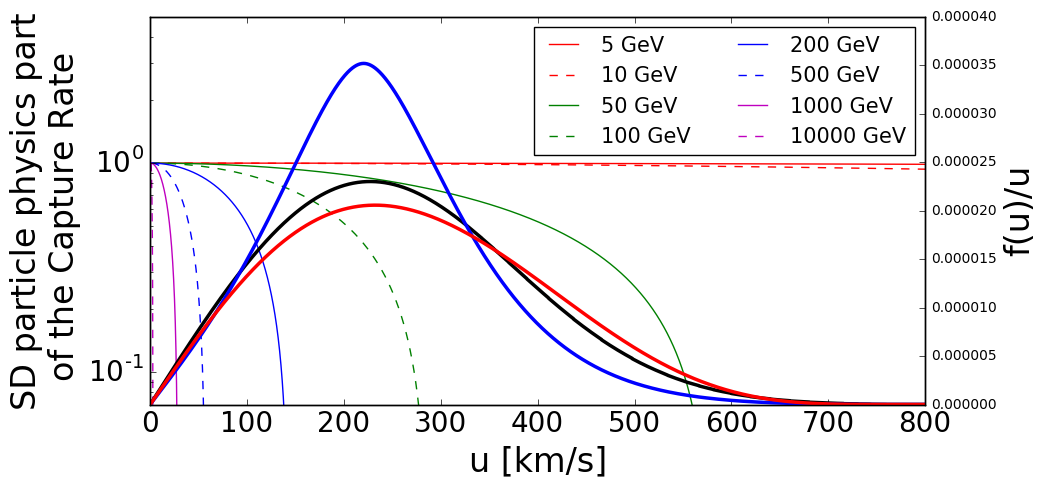

In [5]:
import numpy as np
from numpy import exp, sqrt
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import capLib as ca
import fdulib as vdf
import sys
plt.ion()
plt.close('all')


ca.get_variables() # prints variables in use (check captureLib)
### Plot parameters ###
fig ,ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylim([0.07,5])
ax.set_xlabel('u [km/s]',fontsize=24)
ax.set_ylabel('SD particle physics part\nof the Capture Rate ',fontsize=24)
colors = ('r-','r--', 'g-','g--', 'b-','b--', 'm-','m--' )
face_colors = ('r','r','r', 'g','g', 'b','b', 'm','m' )
########################
normal=ca.normalize_max
arrays=8 * [[]]
x_array = [i for i in np.arange(1,800.,0.1)]
pp = np.vectorize(ca.caprate_GOU)
masses = (5, 10, 50, 100, 200, 500, 1000, 10000)
i = -1
for m,c,fc in zip(masses,colors,face_colors):
        i +=1
        arrays[i]=pp(x_array,m)
        title = str(m)+' GeV'
        ax.plot(x_array, normal(arrays[i]),c,label=title)
#        if i>1:
#                #ax.fill_between(x_array, normal(arrays[i]), normal(arrays[i-2]), alpha=0.2,facecolor=fc)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax2 = ax.twinx()
ax2.set_ylabel('f(u)/u',fontsize=24)

colors = ('k','b','r' )
functions = (vdf.shm_gal,vdf.mao_gal,vdf.lin_gal)
VDF = 3 * [[]]
distribution = np.vectorize(vdf.gal_to_sun)
i = -1
for f, c in zip(functions, colors):
        i += 1
        VDF[i] = distribution(x_array,f)
        ax2.plot(x_array, VDF[i],c, label=title,linewidth=2.5)


legend = ax.legend(loc='upper right', ncol=2, shadow=False, fontsize=15)
## The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
fig.set_size_inches(10, 5)